# Import Library

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Linear Regression
from sklearn.linear_model import LinearRegression

# Ridge Regression
from sklearn.linear_model import Ridge

# Lasso Regression
from sklearn.linear_model import Lasso

# Orthogonal Matching Pursuit
from sklearn.linear_model import OrthogonalMatchingPursuit

# Generalized Linear Model (GLM) / Tweedie Regressor
from sklearn.linear_model import TweedieRegressor

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Support Vector Machines (SVM) for Regression
from sklearn.svm import SVR

# Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron
from sklearn.neural_network import MLPRegressor

# Membuat Input X

In [2]:
X = np.random.randint(20, size=(1000,7))
X = pd.DataFrame(X)
X.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
X

,x1,x2,x3,x4,x5,x6,x7
0,8,16,7,4,10,17,3
1,13,14,18,5,12,9,7
2,14,14,4,2,4,5,9
3,18,14,14,7,2,9,3
4,11,2,12,10,14,0,9
...,...,...,...,...,...,...,...
995,1,2,13,10,17,3,7
996,18,16,12,0,12,7,3
997,0,9,6,18,5,3,2
998,11,19,14,7,1,16,13


# Membuat Output y

In [3]:
y = 5*X['x1'] + 0.1*(X['x2']**2) + 30*(X['x3']**0.5) + X['x4']*X['x5'] + 50
#y = y + np.random.randint(50, size=(1000)) - 25
y

0      234.972539
1      321.879221
2      207.600000
3      285.849722
4      349.323048
          ...    
995    333.566538
996    269.523048
997    221.584692
998    260.349722
999    300.061524
Length: 1000, dtype: float64

# Split Data

In [4]:
X_train = X.loc[0:799]

X_valid = X.loc[800:999]
X_valid.index = range(200)

y_train = y[0:800]

y_valid = y[800:1000]
y_valid.index = range(200)

print(X_train)
print(X_valid)
print(y_train)
print(y_valid)

     x1  x2  x3  x4  x5  x6  x7
0     8  16   7   4  10  17   3
1    13  14  18   5  12   9   7
2    14  14   4   2   4   5   9
3    18  14  14   7   2   9   3
4    11   2  12  10  14   0   9
..   ..  ..  ..  ..  ..  ..  ..
795  14  16   4  19  12   0  19
796  14  12  18   7   3  10  14
797  16  16   4  14  14   4   9
798   3   5  10   6  14   1   3
799  18  10  13  10   6  15   9

[800 rows x 7 columns]
     x1  x2  x3  x4  x5  x6  x7
0    12  16  17   3   7  10  14
1    11  12  13  17  16   4  11
2     0  17  16  10  11  12   9
3     6  14  19  13  10  13  19
4    12  19  15  11   3  16   9
..   ..  ..  ..  ..  ..  ..  ..
195   1   2  13  10  17   3   7
196  18  16  12   0  12   7   3
197   0   9   6  18   5   3   2
198  11  19  14   7   1  16  13
199   8   9   3  15  10   9   5

[200 rows x 7 columns]
0      234.972539
1      321.879221
2      207.600000
3      285.849722
4      349.323048
          ...    
795    433.600000
796    282.679221
797    411.600000
798    246.368330
799 

# Linear Regression

Mean absolute percentage error (MAPE): 0.10
Root mean squared error (RMSE): 34.11
Coefficient of determination (R2): 0.86
-8.76392767914217
[ 4.89073295  1.89369598  5.77588858  9.69584008  9.07924155  0.03577384
 -0.25524869]


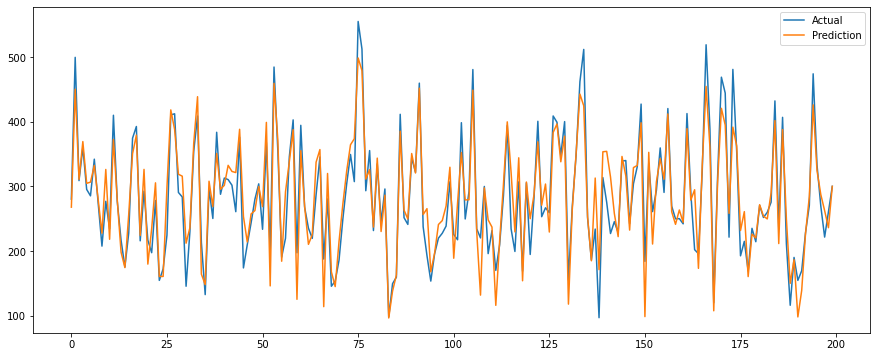

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Ridge Regression

Mean absolute percentage error (MAPE): 0.12
Root mean squared error (RMSE): 40.77
Coefficient of determination (R2): 0.80
68.16821534394956
[ 3.64113867  1.61524012  4.1166173   6.94461011  6.79738428 -0.01955172
 -0.20058613]


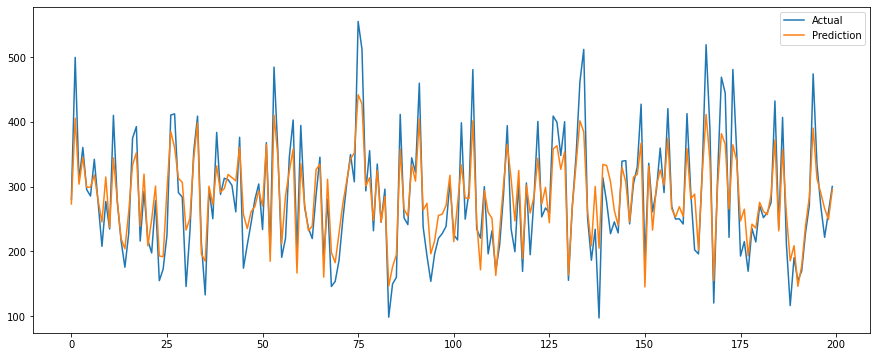

In [6]:
model = Ridge(alpha=10000)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Lasso Regression

Mean absolute percentage error (MAPE): 0.15
Root mean squared error (RMSE): 47.21
Coefficient of determination (R2): 0.73
115.83828891329921
[ 2.06747729  0.          2.71766441  6.43880106  6.62648748 -0.
 -0.        ]


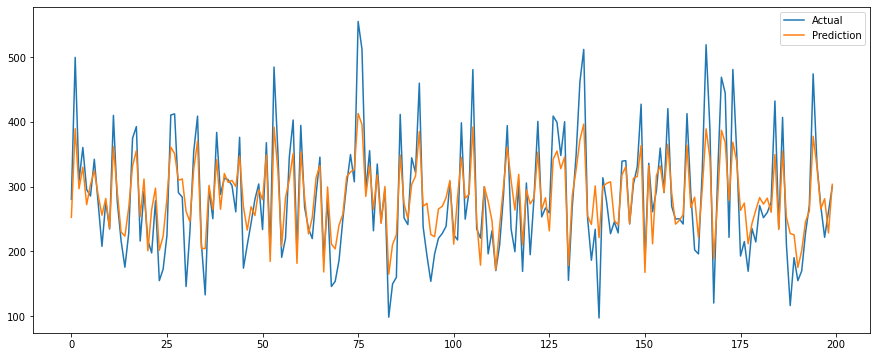

In [7]:
model = Lasso(alpha=100)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Orthogonal Matching Pursuit

Mean absolute percentage error (MAPE): 0.11
Root mean squared error (RMSE): 35.43
Coefficient of determination (R2): 0.85
4.628480777884874
[4.94265325 0.         5.83635773 9.74580861 9.21793699 0.
 0.        ]


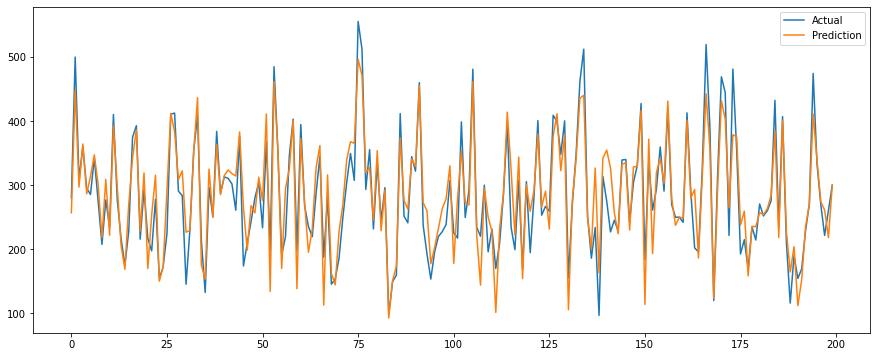

In [26]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=4)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Generalized Linear Model (GLM) / Tweedie Regressor

Mean absolute percentage error (MAPE): 0.09
Root mean squared error (RMSE): 28.78
Coefficient of determination (R2): 0.90
4.564768122316861
[ 0.0171348   0.00707806  0.02000114  0.03402521  0.03243716 -0.00031587
 -0.0005924 ]


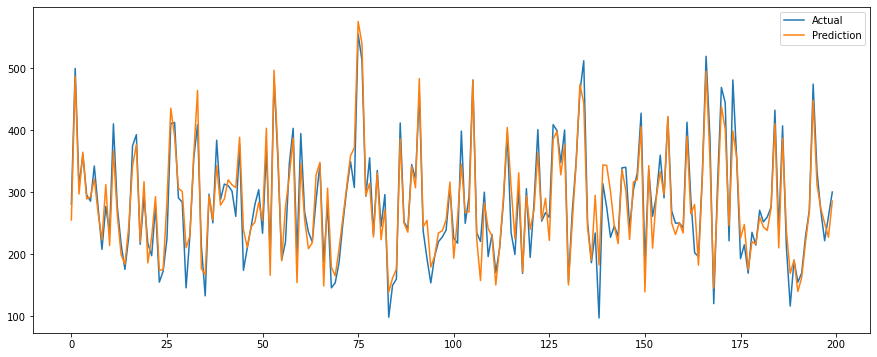

In [25]:
model = TweedieRegressor(power=1, alpha=1)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Polynomial Regression

## Dengan Pipeline

Mean absolute percentage error (MAPE): 0.01
Root mean squared error (RMSE): 3.43
Coefficient of determination (R2): 1.00


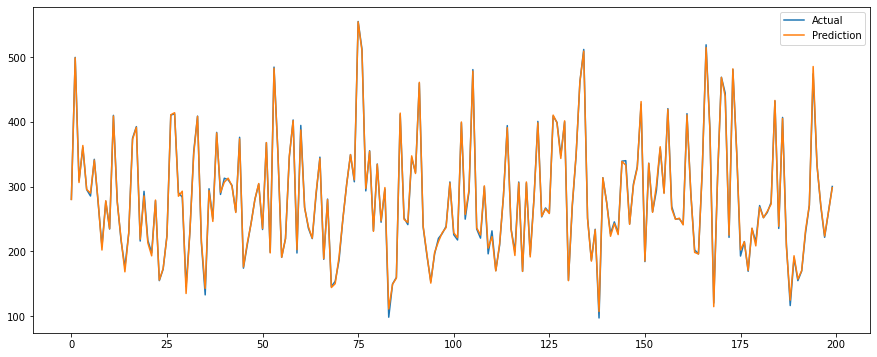

In [37]:
model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

## Tanpa Pipeline (Manual)

     x1  x2  x3  x4  x5  x6  x7
0     8  16   7   4  10  17   3
1    13  14  18   5  12   9   7
2    14  14   4   2   4   5   9
3    18  14  14   7   2   9   3
4    11   2  12  10  14   0   9
..   ..  ..  ..  ..  ..  ..  ..
795  14  16   4  19  12   0  19
796  14  12  18   7   3  10  14
797  16  16   4  14  14   4   9
798   3   5  10   6  14   1   3
799  18  10  13  10   6  15   9

[800 rows x 7 columns]
       x1    x2    x3    x4    x5    x6    x7   x1^2  x1 x2  x1 x3  ...  \
0     8.0  16.0   7.0   4.0  10.0  17.0   3.0   64.0  128.0   56.0  ...   
1    13.0  14.0  18.0   5.0  12.0   9.0   7.0  169.0  182.0  234.0  ...   
2    14.0  14.0   4.0   2.0   4.0   5.0   9.0  196.0  196.0   56.0  ...   
3    18.0  14.0  14.0   7.0   2.0   9.0   3.0  324.0  252.0  252.0  ...   
4    11.0   2.0  12.0  10.0  14.0   0.0   9.0  121.0   22.0  132.0  ...   
..    ...   ...   ...   ...   ...   ...   ...    ...    ...    ...  ...   
795  14.0  16.0   4.0  19.0  12.0   0.0  19.0  196.0  224.0   56.0 

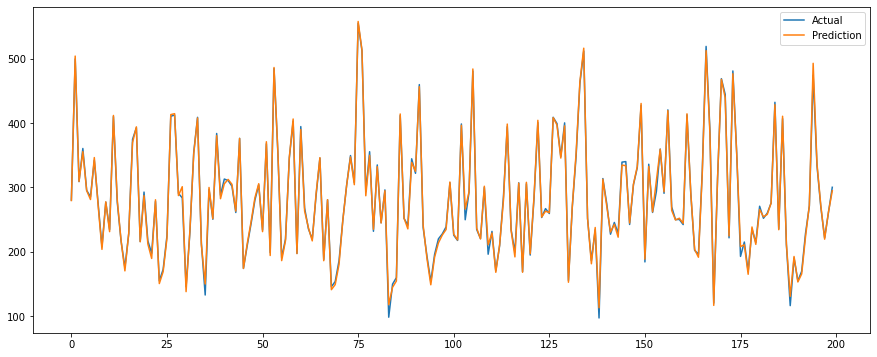

In [49]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

X_train_poly = pd.DataFrame(X_train_poly)
X_valid_poly = pd.DataFrame(X_valid_poly)

X_train_poly.columns = poly.get_feature_names(X_train.columns)
X_valid_poly.columns = poly.get_feature_names(X_train.columns)

print(X_train)
print(X_train_poly)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_valid_pred = model.predict(X_valid_poly)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Support Vector Machines (SVM) for Regression

Mean absolute percentage error (MAPE): 0.06
Root mean squared error (RMSE): 20.34
Coefficient of determination (R2): 0.95


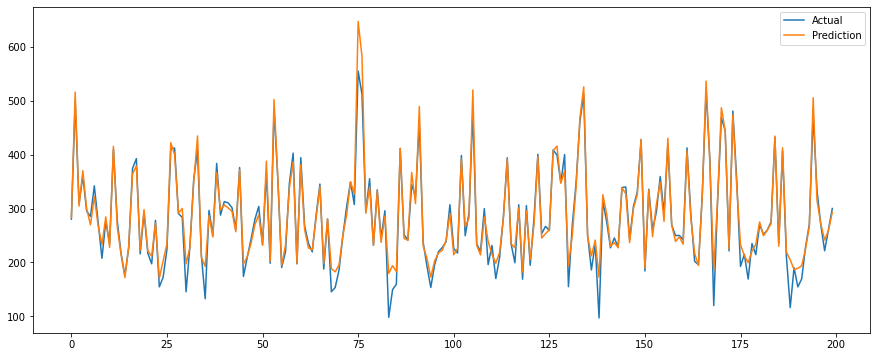

In [58]:
model = SVR(kernel='poly')
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Nearest Neighbors

Mean absolute percentage error (MAPE): 0.09
Root mean squared error (RMSE): 28.18
Coefficient of determination (R2): 0.90


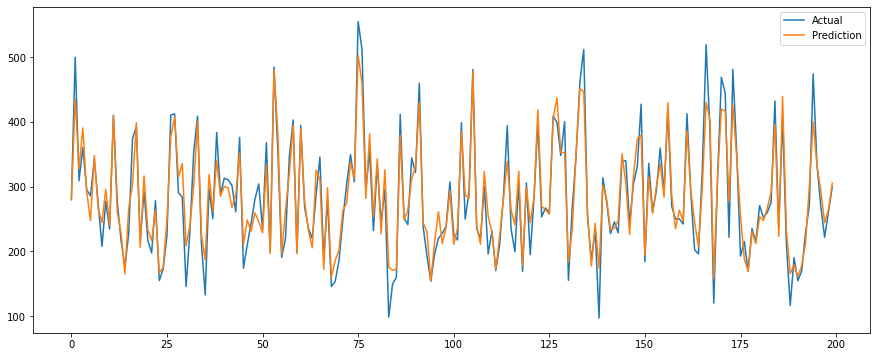

In [73]:
model = KNeighborsRegressor(n_neighbors=5, weights='distance')
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Multi-layer Perceptron

Mean absolute percentage error (MAPE): 0.02
Root mean squared error (RMSE): 6.37
Coefficient of determination (R2): 1.00


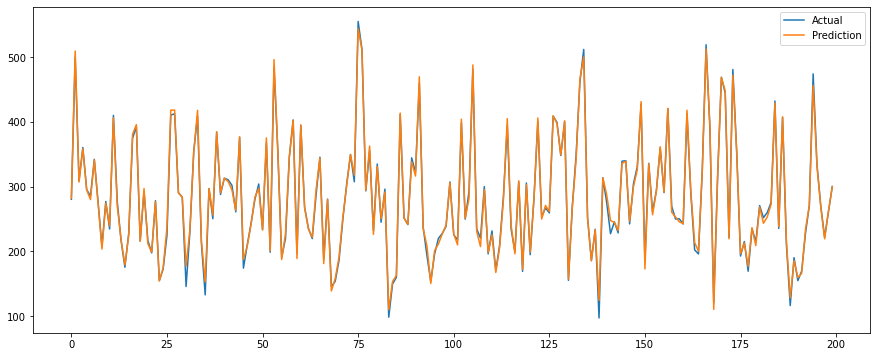

In [80]:
model = MLPRegressor(hidden_layer_sizes=(100), activation='logistic', solver='adam', max_iter=10000)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()